In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customer/Mall_Customers.csv


In [30]:
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("/kaggle/input/mall-customer/Mall_Customers.csv")

In [32]:
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
df["Genre"] = df["Genre"].map({ 'Male' : 0 , 'Female' : 1 })

In [36]:
df = df.drop('CustomerID' , axis = 1)

In [37]:
df

,Genre,Age,Annual_Income_(k$),Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [38]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [39]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(df)


In [40]:
from sklearn.cluster import KMeans

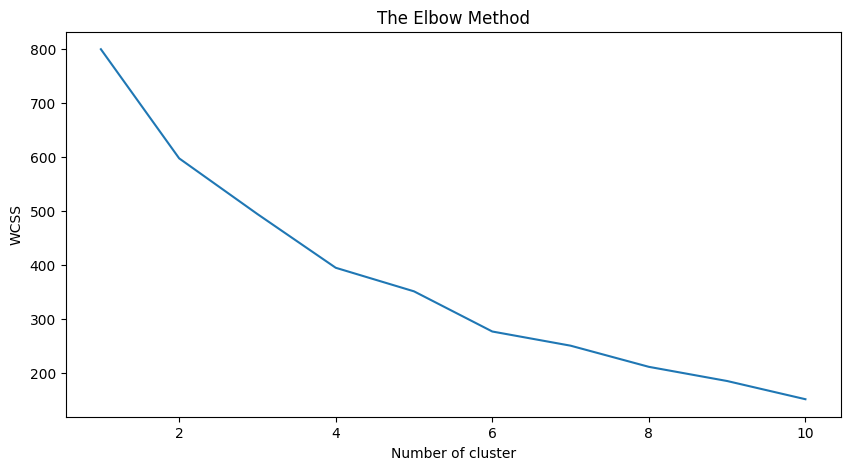

In [41]:
wcss = []

for i in range(1,11):
    k_m = KMeans(n_clusters=i,init='k-means++',random_state=42)
    k_m.fit(X)
    wcss.append(k_m.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmean = kmeans.fit_predict(X)

In [46]:
kmeans.inertia_

277.389740198519

In [50]:
kmeans.labels_

array([2, 2, 4, 4, 4, 4, 5, 4, 0, 4, 0, 4, 5, 4, 0, 2, 4, 2, 0, 4, 0, 2,
       5, 2, 5, 2, 5, 2, 5, 4, 0, 4, 0, 2, 5, 4, 5, 4, 5, 4, 5, 2, 0, 4,
       5, 4, 5, 4, 4, 4, 5, 2, 4, 0, 5, 0, 5, 0, 4, 0, 0, 2, 5, 5, 0, 2,
       5, 5, 2, 4, 0, 5, 5, 5, 0, 2, 5, 2, 4, 5, 0, 2, 0, 5, 4, 0, 5, 4,
       4, 5, 5, 2, 0, 5, 4, 2, 5, 4, 0, 2, 4, 5, 0, 2, 0, 4, 5, 0, 0, 0,
       0, 4, 5, 2, 4, 4, 5, 5, 5, 5, 2, 5, 3, 2, 4, 3, 1, 2, 0, 2, 1, 2,
       4, 3, 1, 3, 5, 2, 1, 3, 5, 2, 3, 3, 1, 2, 1, 3, 5, 2, 1, 2, 5, 3,
       5, 3, 1, 3, 1, 3, 5, 3, 1, 3, 1, 3, 1, 3, 5, 2, 1, 2, 1, 2, 5, 3,
       1, 2, 1, 2, 3, 3, 1, 3, 3, 2, 5, 2, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3,
       1, 3], dtype=int32)

In [51]:
kmeans.cluster_centers_

array([[-1.12815215,  1.31794399, -0.52575662, -0.44589335],
       [-0.93628954,  0.010765  ,  1.06009228, -1.38870269],
       [-1.12815215, -0.74922584, -0.08890541,  0.79653879],
       [ 0.74747027, -0.40498685,  1.16319361,  0.85166472],
       [ 0.88640526, -0.93017604, -0.73599142,  0.30065142],
       [ 0.88640526,  0.79409079, -0.24064607, -0.5306164 ]])

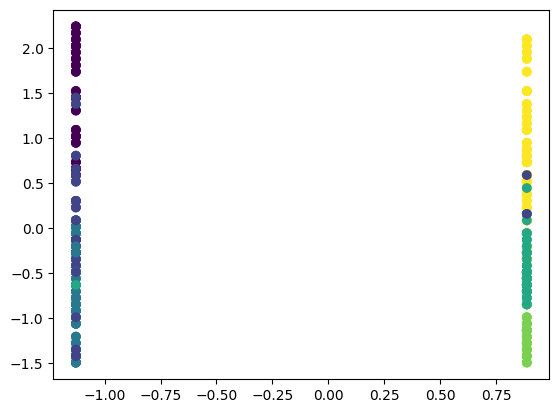

In [53]:
labels = kmeans.labels_
df['cluster'] = labels
centroids = kmeans.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()
